In [1]:
import shutil
import warnings
from glob import glob
import os
import numpy as np
import librosa
from librosa import feature
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from spafe.utils import vis
from spafe.features.lpc import lpc
from scipy import io
from scipy.io import wavfile
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, plot_confusion_matrix, recall_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import pickle

In [14]:
dataset = 'D:\\COVID_19_dataset\\final\\'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(dataset):    
    for file in f:
        if '.wav' in file:
            files.append(os.path.join(r,file))

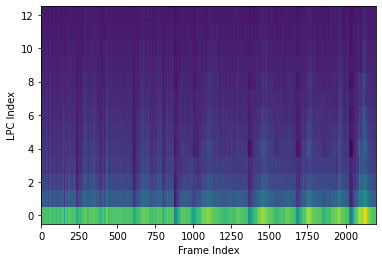

In [15]:
file_path = 'D:\\COVID_19_dataset\\final\\0Ha52POVIxTKEPqI1eGpIoMHUd52\\breathing-deep.wav'
num_ceps = 13
lifter = 0
normalize = True
    
# read wav 
fs, sig = scipy.io.wavfile.read(file_path)

# compute lpcs
lpcs = lpc(sig=sig, fs=fs, num_ceps=num_ceps)
vis.visualize_features(lpcs, 'LPC Index', 'Frame Index')


In [16]:
def extract_lpc_features(breathing_deep, breathing_shallow, cough_heavy, cough_shallow, counting_fast, 
                          counting_normal, vowel_a, vowel_e, vowel_o, files,num_ceps = 13,lifter = 0,normalize = True ):
    for f in files:
        file_name = f.split("\\")[-1]
        id1 = []
        id1.append(f.split("\\")[3])
        fs, sig = scipy.io.wavfile.read(f)
        lpcs = lpc(sig=sig, fs=fs, num_ceps=num_ceps)
        lpcs_1 = np.mean(lpcs, axis=0).tolist()


        if file_name == 'breathing-deep.wav':
            breathing_deep.append(id1 + lpcs_1)

        elif file_name == 'breathing-shallow.wav':
            breathing_shallow.append(id1 + lpcs_1)

        elif file_name == 'cough-heavy.wav':
            cough_heavy.append(id1 + lpcs_1)

        elif file_name == 'cough-shallow.wav':
            cough_shallow.append(id1 + lpcs_1)

        elif file_name == 'counting-fast.wav':
            counting_fast.append(id1 + lpcs_1)

        elif file_name == 'counting-normal.wav':
            counting_normal.append(id1 + lpcs_1)

        elif file_name == 'vowel-a.wav':
            vowel_a.append(id1 + lpcs_1)

        elif file_name == 'vowel-e.wav':
            vowel_e.append(id1 + lpcs_1)

        elif file_name == 'vowel-o.wav':
            vowel_o.append(id1 + lpcs_1)


In [21]:
#extract lpc features
# lpc_breathing_deep = []
# lpc_breathing_shallow = []
# lpc_cough_heavy = []
# lpc_cough_shallow = []
# lpc_counting_fast = []
# lpc_counting_normal = []
# lpc_vowel_a =[]
# lpc_vowel_e = []
# lpc_vowel_o = []

# extract_lpc_features(lpc_breathing_deep, lpc_breathing_shallow, lpc_cough_heavy, lpc_cough_shallow, lpc_counting_fast, 
#                      lpc_counting_normal, lpc_vowel_a, lpc_vowel_e, lpc_vowel_o, files)

In [19]:
def write_audio_features(path ,list_name,header_name):
    header = ['id']
    for i in range(1,14):
        header.append(f' {header_name}_lpc_{i}')
    with open (path,'w') as f:
        csv_writer = csv.writer(f, delimiter = ',')
        csv_writer.writerow(header)
        csv_writer.writerows(list_name)    


In [20]:
 #write lpc features
# path1 = "D:\\COVID_19_dataset\\lpc_files\\lpc_breathing_deep.csv"
# path2 = "D:\\COVID_19_dataset\\lpc_files\\lpc_breathing_shallow.csv"
# path3 = "D:\\COVID_19_dataset\\lpc_files\\lpc_cough_heavy.csv"
# path4 = "D:\\COVID_19_dataset\\lpc_files\\lpc_cough_shallow.csv"
# path5 = "D:\\COVID_19_dataset\\lpc_files\\lpc_counting_fast.csv"
# path6 = "D:\\COVID_19_dataset\\lpc_files\\lpc_counting_normal.csv"
# path7 = "D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_a.csv"
# path8 = "D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_e.csv"
# path9 = "D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_o.csv"

# write_audio_features(path1,lpc_breathing_deep,'lpc_breathing_deep')
# write_audio_features(path2,lpc_breathing_shallow,'lpc_breathing_shallow')
# write_audio_features(path3,lpc_cough_heavy,'lpc_cough_heavy')
# write_audio_features(path4,lpc_cough_shallow,'lpc_cough_shallow')
# write_audio_features(path5,lpc_counting_fast,'lpc_counting_fast')
# write_audio_features(path6,lpc_counting_normal,'lpc_counting_normal')
# write_audio_features(path7,lpc_vowel_a,'lpc_vowel_a')
# write_audio_features(path8,lpc_vowel_e,'lpc_vowel_e')
# write_audio_features(path9,lpc_vowel_o,'lpc_vowel_o')

In [22]:
brething_deep_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_breathing_deep.csv")
brething_shallow_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_breathing_shallow.csv")
cough_heavy_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_cough_heavy.csv")
cough_shallow_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_cough_shallow.csv")
counting_fast_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_counting_fast.csv")
counting_normal_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_counting_normal.csv")
vowel_a_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_a.csv")
vowel_e_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_e.csv")
vowel_o_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\lpc_vowel_o.csv")

main_df = brething_deep_df.merge(brething_shallow_df,on='id')
main_df = main_df.merge(cough_heavy_df, on='id')
main_df = main_df.merge(cough_shallow_df, on='id')
main_df = main_df.merge(counting_fast_df, on = 'id')
main_df = main_df.merge(counting_normal_df, on = 'id')
main_df = main_df.merge(vowel_a_df, on = 'id')
main_df = main_df.merge(vowel_e_df, on = 'id')
main_df = main_df.merge(vowel_o_df, on = 'id')
print(main_df.shape)
main_df.head()

(369, 118)


,id,lpc_breathing_deep_lpc_1,lpc_breathing_deep_lpc_2,lpc_breathing_deep_lpc_3,lpc_breathing_deep_lpc_4,lpc_breathing_deep_lpc_5,lpc_breathing_deep_lpc_6,lpc_breathing_deep_lpc_7,lpc_breathing_deep_lpc_8,lpc_breathing_deep_lpc_9,...,lpc_vowel_o_lpc_4,lpc_vowel_o_lpc_5,lpc_vowel_o_lpc_6,lpc_vowel_o_lpc_7,lpc_vowel_o_lpc_8,lpc_vowel_o_lpc_9,lpc_vowel_o_lpc_10,lpc_vowel_o_lpc_11,lpc_vowel_o_lpc_12,lpc_vowel_o_lpc_13
0,05acPS4aRGfvuOfku11Za8zve8i2,1.645349,0.602400,0.415164,0.316493,0.278121,0.243319,0.208380,0.178549,0.154824,...,0.325400,0.283129,0.248086,0.214423,0.182128,0.154383,0.128056,0.105776,0.083889,0.063966
1,05bieNLXPuaIWEVaX81EkbbjVrh1,1.773221,0.729689,0.460382,0.288749,0.317957,0.276642,0.239371,0.182376,0.181781,...,0.338758,0.297515,0.256601,0.221919,0.184186,0.159528,0.131182,0.110807,0.085808,0.067483
2,0Ha52POVIxTKEPqI1eGpIoMHUd52,1.649440,0.609022,0.423866,0.323811,0.285856,0.250621,0.216169,0.183040,0.158062,...,0.325774,0.282466,0.244650,0.211536,0.178456,0.152744,0.126301,0.105280,0.082739,0.063590
3,0HIgO2EhOOW1msCbEw1kC8Qsx6D3,1.656867,0.608613,0.417118,0.320131,0.278076,0.242899,0.208410,0.178008,0.151181,...,0.336078,0.296873,0.251449,0.219024,0.183251,0.158242,0.128169,0.108335,0.082334,0.062304
4,0KSi2atlmsXNcGMfpDNzIjJSvC23,1.637311,0.598834,0.416839,0.319186,0.277388,0.244501,0.209580,0.177421,0.151671,...,0.351737,0.338359,0.283294,0.242909,0.196827,0.186958,0.138752,0.115117,0.088173,0.081994


In [23]:
col = ['id','a','covid_status','ep','g','l_c','l_l','l_s','rU','asthma','cough','smoker','test','ht','cold','diabetes','um','ihd','bd','st','fever','ftg','mp','loss_of_smell','test_status','diarrhoea','cld','pneumonia']
disease = pd.read_csv("https://raw.githubusercontent.com/iiscleap/Coswara-Data/master/combined_data.csv",names=col,header=None)
disease.head()

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,...,bd,st,fever,ftg,mp,loss_of_smell,test_status,diarrhoea,cld,pneumonia
0,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,...,bd,st,fever,ftg,mp,loss_of_smell,test_status,diarrhoea,cld,pneumonia
1,DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,y,female,United States,Madison,Wisconsin,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,y,female,India,24 pargana,West Bengal,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,y,male,India,Kolkata,West Bengal,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,y,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
final_Df = main_df.merge(disease,on='id')
final_Df.head()

,id,lpc_breathing_deep_lpc_1,lpc_breathing_deep_lpc_2,lpc_breathing_deep_lpc_3,lpc_breathing_deep_lpc_4,lpc_breathing_deep_lpc_5,lpc_breathing_deep_lpc_6,lpc_breathing_deep_lpc_7,lpc_breathing_deep_lpc_8,lpc_breathing_deep_lpc_9,...,bd,st,fever,ftg,mp,loss_of_smell,test_status,diarrhoea,cld,pneumonia
0,05acPS4aRGfvuOfku11Za8zve8i2,1.645349,0.602400,0.415164,0.316493,0.278121,0.243319,0.208380,0.178549,0.154824,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05bieNLXPuaIWEVaX81EkbbjVrh1,1.773221,0.729689,0.460382,0.288749,0.317957,0.276642,0.239371,0.182376,0.181781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0Ha52POVIxTKEPqI1eGpIoMHUd52,1.649440,0.609022,0.423866,0.323811,0.285856,0.250621,0.216169,0.183040,0.158062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0HIgO2EhOOW1msCbEw1kC8Qsx6D3,1.656867,0.608613,0.417118,0.320131,0.278076,0.242899,0.208410,0.178008,0.151181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0KSi2atlmsXNcGMfpDNzIjJSvC23,1.637311,0.598834,0.416839,0.319186,0.277388,0.244501,0.209580,0.177421,0.151671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
X = final_Df.iloc[:, 1:118]
y = final_Df.iloc[:,119:120]
X.shape

(369, 117)

In [74]:
y_encode = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y_encode,test_size=0.20)
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)
rdf = RandomForestClassifier() 
# scoring = {'Recall': make_scorer(recall_score),
#            'f1_score': make_scorer(f1_score)
#           }

params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1)
grid_clf.fit(x_train, y_train)
train_pred = grid_clf.predict(x_test)
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, train_pred)))
print('5. Accuracy \n {} \n'.format(accuracy_score(y_test, train_pred)))



E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1. The F-1 score of the model 0.12947658402203857

2. The recall score of the model 0.16666666666666666



E:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Classification report 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        47
           1       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         7

    accuracy                           0.64        74
   macro avg       0.11      0.17      0.13        74
weighted avg       0.40      0.64      0.49        74
 

4. Confusion matrix 
 [[47  0  0  0  0  0]
 [ 6  0  0  0  0  0]
 [11  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 7  0  0  0  0  0]] 

5. Accuracy 
 0.6351351351351351 



In [114]:
X = final_Df.iloc[:, 1:118]
y = final_Df.iloc[:,119:120]

oversample = SMOTE()
X_ROS, y_ROS = oversample.fit_resample(X,y)
y_encode = LabelEncoder().fit_transform(y_ROS)
x_train,x_test,y_train,y_test = train_test_split(X_ROS, y_encode,test_size=0.20,random_state=42)
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)

rf_classifier = RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rfgrid_with_over = GridSearchCV(rf_classifier, hyperF, cv = cv, n_jobs = -1)
rfgrid_with_over.fit(x_train, y_train)
rfgrid_with_over_prob = rfgrid_with_over.predict(x_test)
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, rfgrid_with_over_prob, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, rfgrid_with_over_prob, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, rfgrid_with_over_prob)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, rfgrid_with_over_prob)))
print('5. Accuracy \n {} \n'.format(accuracy_score(y_test, rfgrid_with_over_prob)))


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1. The F-1 score of the model 0.9580751529288039

2. The recall score of the model 0.9601039430307724

3. Classification report 
               precision    recall  f1-score   support

           0       1.00      0.76      0.87        55
           1       0.96      1.00      0.98        52
           2       1.00      1.00      1.00        41
           3       0.90      1.00      0.95        54
           4       0.96      1.00      0.98        53
           5       0.98      0.98      0.98        41
           6       0.93      0.98      0.95        54

    accuracy                           0.96       350
   macro avg       0.96      0.96      0.96       350
weighted avg       0.96      0.96      0.96       350
 

4. Confusion matrix 
 [[42  1  0  5  2  1  4]
 [ 0 52  0  0  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  0  0 54  0  0  0]
 [ 0  0  0  0 53  0  0]
 [ 0  0  0  1  0 40  0]
 [ 0  1  0  0  0  0 53]] 

5. Accuracy 
 0.9571428571428572 



In [28]:
audio_path = 'D:\\COVID_19_dataset\\final\\Za0aCHrh7pcZrQI3Qg5JiSOl3o42'
test_files = []
for r, d, f in os.walk(audio_path):    
    for file in f:
        if '.wav' in file:
            test_files.append(os.path.join(r,file))


test_lpc_breathing_deep = []
test_lpc_breathing_shallow = []
test_lpc_cough_heavy = []
test_lpc_cough_shallow = []
test_lpc_counting_fast = []
test_lpc_counting_normal = []
test_lpc_vowel_a =[]
test_lpc_vowel_e = []
test_lpc_vowel_o = []

extract_lpc_features(test_lpc_breathing_deep,test_lpc_breathing_shallow, test_lpc_cough_heavy,test_lpc_cough_shallow, test_lpc_counting_fast,
                     test_lpc_counting_normal, test_lpc_vowel_a, test_lpc_vowel_e, test_lpc_vowel_o, test_files)


path1 = "D:\\COVID_19_dataset\\lpc_files\\test_breathing_deep.csv"
path2 = "D:\\COVID_19_dataset\\lpc_files\\test_breathing_shallow.csv"
path3 = "D:\\COVID_19_dataset\\lpc_files\\test_cough_heavy.csv"
path4 = "D:\\COVID_19_dataset\\lpc_files\\test_cough_shallow.csv"
path5 = "D:\\COVID_19_dataset\\lpc_files\\test_counting_fast.csv"
path6 = "D:\\COVID_19_dataset\\lpc_files\\test_counting_normal.csv"
path7 = "D:\\COVID_19_dataset\\lpc_files\\test_vowel_a.csv"
path8 = "D:\\COVID_19_dataset\\lpc_files\\test_vowel_e.csv"
path9 = "D:\\COVID_19_dataset\\lpc_files\\test_vowel_o.csv"

write_audio_features(path1,test_lpc_breathing_deep,'breathing_deep')
write_audio_features(path2,test_lpc_breathing_shallow,'breathing_shallow')
write_audio_features(path3,test_lpc_cough_heavy,'cough_heavy')
write_audio_features(path4,test_lpc_cough_shallow,'cough_shallow')
write_audio_features(path5,test_lpc_counting_fast,'counting_fast')
write_audio_features(path6,test_lpc_counting_normal,'counting_normal')
write_audio_features(path7,test_lpc_vowel_a,'vowel_a')
write_audio_features(path8,test_lpc_vowel_e,'vowel_e')
write_audio_features(path9,test_lpc_vowel_o,'vowel_o')


brething_deep_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_breathing_deep.csv")
brething_shallow_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_breathing_shallow.csv")
cough_heavy_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_cough_heavy.csv")
cough_shallow_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_cough_shallow.csv")
counting_fast_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_counting_fast.csv")
counting_normal_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_counting_normal.csv")
vowel_a_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_vowel_a.csv")
vowel_e_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_vowel_e.csv")
vowel_o_df = pd.read_csv("D:\\COVID_19_dataset\\lpc_files\\test_vowel_o.csv")

test_main_df = brething_deep_df.merge(brething_shallow_df,on='id')
test_main_df = test_main_df.merge(cough_heavy_df, on='id')
test_main_df = test_main_df.merge(cough_shallow_df, on='id')
test_main_df = test_main_df.merge(counting_fast_df, on = 'id')
test_main_df = test_main_df.merge(counting_normal_df, on = 'id')
test_main_df = test_main_df.merge(vowel_a_df, on = 'id')
test_main_df = test_main_df.merge(vowel_e_df, on = 'id')
test_main_df = test_main_df.merge(vowel_o_df, on = 'id')
test_main_df.head()

# final_Df = test_main_df.merge(mfcc_main_df,on='id')
# index = final_Df['id']
# print(index)
# test_prob = rfgrid_with_over.predict(test_main_df.iloc[:,1:])
# # print(f 'The {index} is:')
# # print(test_prob)
# label_dict ={0: 'healthy',
#              1: 'no_resp_illness_exposed',
#              2: 'positive_asymp',
#              3: 'positive_mild',
#              4: 'positive_moderate',
#              5: 'recovered_full',
#              6: 'resp_illness_not_identified'}
# print(f'The person is diagonised as {label_dict[test_prob[0]]}.')

,id,breathing_deep_lpc_1,breathing_deep_lpc_2,breathing_deep_lpc_3,breathing_deep_lpc_4,breathing_deep_lpc_5,breathing_deep_lpc_6,breathing_deep_lpc_7,breathing_deep_lpc_8,breathing_deep_lpc_9,...,vowel_o_lpc_4,vowel_o_lpc_5,vowel_o_lpc_6,vowel_o_lpc_7,vowel_o_lpc_8,vowel_o_lpc_9,vowel_o_lpc_10,vowel_o_lpc_11,vowel_o_lpc_12,vowel_o_lpc_13
0,Za0aCHrh7pcZrQI3Qg5JiSOl3o42,1.725931,0.649601,0.413262,0.294619,0.322427,0.250019,0.208964,0.16886,0.17599,...,0.310058,0.258202,0.23277,0.201102,0.174202,0.144412,0.121919,0.099876,0.080609,0.061827


In [147]:
index = final_Df[final_Df['id'] == 'Za0aCHrh7pcZrQI3Qg5JiSOl3o42']
index.iloc[:,119:120]

,covid_status
358,no_resp_illness_exposed


In [151]:
filename = 'COVID-19 Results\\covid_19_lpc.pkl'
with open(filename, 'wb') as file:  
    pickle.dump(rfgrid_with_over, file)


In [6]:
rf = open('COVID-19 Results\\covid_19_lpc.pkl',"rb")
result_rf = pickle.load(rf)

In [54]:
audio_path = 'D:\\COVID_19_dataset\\final\\Za0aCHrh7pcZrQI3Qg5JiSOl3o42'
test_files = []
feature_list  = []
num_ceps = 13
for r, d, f in os.walk(audio_path):    
    for file in f:
        if '.wav' in file:
            test_files.append(os.path.join(r,file))
i = 1
for f1 in test_files:
    file_name = f1.split("\\")[-1]
    id1 = []
    id1.append(f1.split("\\")[3])
    fs, sig = scipy.io.wavfile.read(f1)
    lpcs = lpc(sig=sig, fs=fs, num_ceps=num_ceps)
    lpcs_1 = np.mean(lpcs, axis=0).tolist()
    feature_list.append(id1 + lpcs_1)
    cols = ['id']
    for i in range(1,14):
        cols.append(f' {file_name}_{i}')
    
    if file_name == 'breathing-deep.wav':
            df1 = pd.DataFrame(feature_list, columns=cols)
            feature_list.clear()

    elif file_name == 'breathing-shallow.wav':
            df2 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()

    elif file_name == 'cough-heavy.wav':
            df3 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'cough-shallow.wav':
            df4 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'counting-fast.wav':
            df5 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'counting-normal.wav':
            df6 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'vowel-a.wav':
            df7 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'vowel-e.wav':
            df8 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
    elif file_name == 'vowel-o.wav':
            df9 = pd.DataFrame(feature_list,columns=cols)
            feature_list.clear()
            
test_main_df = df1.merge(df2,on='id')
test_main_df = test_main_df.merge(df3, on='id')
test_main_df = test_main_df.merge(df4, on='id')
test_main_df = test_main_df.merge(df5, on = 'id')
test_main_df = test_main_df.merge(df6, on = 'id')
test_main_df = test_main_df.merge(df7, on = 'id')
test_main_df = test_main_df.merge(df8, on = 'id')
test_main_df = test_main_df.merge(df9, on = 'id')
test_main_df
test_prob = result_rf.predict(test_main_df.iloc[:,1:])
print(test_prob)

[1]
